<a href="https://colab.research.google.com/github/Vishnucreate/Ai_ml_notebooks/blob/main/AUTOMATIC_GenticAlgorithm_Time_Table_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generation 1: Best Fitness = 5
Generation 2: Best Fitness = 5
Generation 3: Best Fitness = 5
Generation 4: Best Fitness = 5
Generation 5: Best Fitness = 5
Generation 6: Best Fitness = 5
Generation 7: Best Fitness = 5
Generation 8: Best Fitness = 5
Generation 9: Best Fitness = 5
Generation 10: Best Fitness = 5
Generation 11: Best Fitness = 5
Generation 12: Best Fitness = 5
Generation 13: Best Fitness = 5
Generation 14: Best Fitness = 5
Generation 15: Best Fitness = 5
Generation 16: Best Fitness = 5
Generation 17: Best Fitness = 5
Generation 18: Best Fitness = 5
Generation 19: Best Fitness = 5
Generation 20: Best Fitness = 5
Generation 21: Best Fitness = 5
Generation 22: Best Fitness = 5
Generation 23: Best Fitness = 5
Generation 24: Best Fitness = 5
Generation 25: Best Fitness = 5
Generation 26: Best Fitness = 5
Generation 27: Best Fitness = 5
Generation 28: Best Fitness = 5
Generation 29: Best Fitness = 5
Generation 30: Best Fitness = 5
Generation 31: Best Fitness = 5
Generation 32: Be

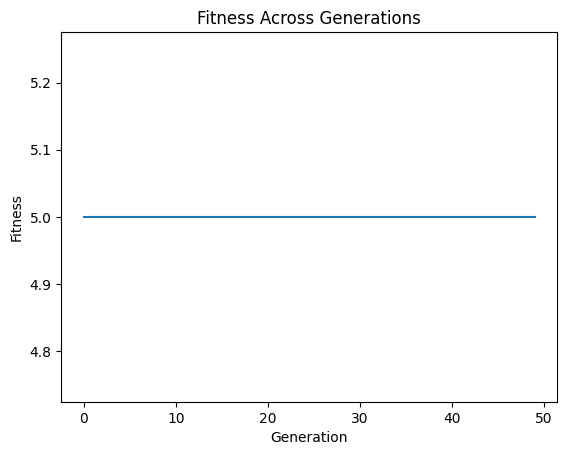


Best Timetable:
[3, 2, 3, 1, 2]
[3, 0, 0, 0, 0]
[1, 1, 0, 1, 4]
[2, 4, 1, 2, 0]
[4, 3, 2, 2, 3]


In [ ]:
import random
import copy

class TimetableGenerator:
    def __init__(self, num_courses, num_timeslots, num_days, population_size, generations, teacher_availability):
        self.num_courses = num_courses
        self.num_timeslots = num_timeslots
        self.num_days = num_days
        self.population_size = population_size
        self.generations = generations
        self.teacher_availability = teacher_availability

    def generate_random_timetable(self):
        timetable = [[random.randint(0, self.num_timeslots-1) for _ in range(self.num_days)] for _ in range(self.num_courses)]
        return timetable

    def calculate_fitness(self, timetable):
        conflicts = 0
        for day in range(len(timetable[0])):
            timeslot_count = [0] * (max(max(row[day] for row in timetable), 1) + 1)
            for course in range(len(timetable)):
                timeslot_count[timetable[course][day]] += 1
            conflicts += sum(max(0, count - 1) for count in timeslot_count)
        return conflicts

    def crossover(self, parent1, parent2):
        point1 = random.randint(0, len(parent1) - 1)
        point2 = random.randint(point1, len(parent1))
        child = parent1[:point1] + parent2[point1:point2] + parent1[point2:]
        return child

    def mutate(self, timetable):
        course1, course2 = random.sample(range(len(timetable)), 2)
        day = random.randint(0, len(timetable[0]) - 1)
        timetable[course1][day], timetable[course2][day] = timetable[course2][day], timetable[course1][day]

    def apply_constraints(self, timetable):
        self.apply_teacher_availability_constraint(timetable, self.teacher_availability)

    def apply_teacher_availability_constraint(self, timetable, teacher_availability):
        for teacher, availability in teacher_availability.items():
            for day_schedule in timetable:
                for i, course_timeslot in enumerate(day_schedule):
                    if course_timeslot == teacher and availability[day_schedule[i]] == 0:
                        new_timeslot = random.choice([ts for ts in range(len(day_schedule)) if ts != course_timeslot])
                        day_schedule[i] = new_timeslot

    def genetic_algorithm(self):
        population = [self.generate_random_timetable() for _ in range(self.population_size)]

        for generation in range(self.generations):
            population = sorted(population, key=lambda x: self.calculate_fitness(x))

            elite = copy.deepcopy(population[:self.population_size // 2])

            children = []
            while len(children) < self.population_size - len(elite):
                parent1, parent2 = random.sample(elite, 2)
                child = self.crossover(parent1, parent2)
                if random.random() < 0.1:
                    self.mutate(child)
                self.apply_constraints(child)
                children.append(child)

            population = elite + children

            print(f"Generation {generation+1}: Best Fitness = {self.calculate_fitness(population[0])}")

        best_timetable = population[0]
        return best_timetable

# Example usage
num_courses = 5
num_timeslots = 5
num_days = 5
population_size = 10
generations = 50

teacher_availability = {
    0: [1, 1, 1, 1, 1],
    1: [1, 1, 1, 1, 1]
}

timetable_generator = TimetableGenerator(num_courses, num_timeslots, num_days, population_size, generations, teacher_availability)
best_timetable = timetable_generator.genetic_algorithm()

print("\nBest Timetable:")
for row in best_timetable:
    print(row)

Generation 1: Best Fitness = 4
Generation 2: Best Fitness = 4
Generation 3: Best Fitness = 4
Generation 4: Best Fitness = 4
Generation 5: Best Fitness = 4
Generation 6: Best Fitness = 5
Generation 7: Best Fitness = 5
Generation 8: Best Fitness = 5
Generation 9: Best Fitness = 5
Generation 10: Best Fitness = 5
Generation 11: Best Fitness = 5
Generation 12: Best Fitness = 5
Generation 13: Best Fitness = 5
Generation 14: Best Fitness = 5
Generation 15: Best Fitness = 5
Generation 16: Best Fitness = 5
Generation 17: Best Fitness = 5
Generation 18: Best Fitness = 5
Generation 19: Best Fitness = 5
Generation 20: Best Fitness = 5
Generation 21: Best Fitness = 5
Generation 22: Best Fitness = 5
Generation 23: Best Fitness = 5
Generation 24: Best Fitness = 5
Generation 25: Best Fitness = 5
Generation 26: Best Fitness = 5
Generation 27: Best Fitness = 5
Generation 28: Best Fitness = 5
Generation 29: Best Fitness = 5
Generation 30: Best Fitness = 5
Generation 31: Best Fitness = 5
Generation 32: Be

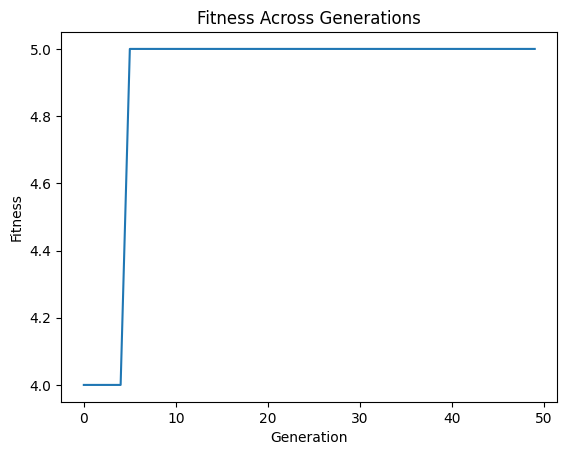


Best Timetable:
[3, 0, 2, 1, 0]
[3, 4, 2, 0, 4]
[4, 2, 1, 0, 3]
[4, 1, 0, 3, 2]
[4, 3, 3, 4, 1]


In [ ]:
import random
import copy
import matplotlib.pyplot as plt

class GeneticAlgorithmScheduler:
    def __init__(self, num_courses, num_timeslots, num_days, population_size, generations, teacher_availability):
        self.num_courses = num_courses
        self.num_timeslots = num_timeslots
        self.num_days = num_days
        self.population_size = population_size
        self.generations = generations
        self.teacher_availability = teacher_availability

    def generate_random_timetable(self):
        return [[random.randint(0, self.num_timeslots-1) for _ in range(self.num_days)] for _ in range(self.num_courses)]

    def calculate_fitness(self, timetable):
        conflicts = 0
        for day in range(len(timetable[0])):
            timeslot_count = [0] * (max(max(row[day] for row in timetable), 1) + 1)
            for course in range(len(timetable)):
                timeslot_count[timetable[course][day]] += 1
            conflicts += sum(max(0, count - 1) for count in timeslot_count)
        return conflicts

    def crossover(self, parent1, parent2):
        point1 = random.randint(0, len(parent1) - 1)
        point2 = random.randint(point1, len(parent1))
        child = parent1[:point1] + parent2[point1:point2] + parent1[point2:]
        return child

    def mutate(self, timetable):
        course1, course2 = random.sample(range(len(timetable)), 2)
        day = random.randint(0, len(timetable[0]) - 1)
        timetable[course1][day], timetable[course2][day] = timetable[course2][day], timetable[course1][day]

    def apply_constraints(self, timetable):
        self.apply_teacher_availability_constraint(timetable, self.teacher_availability)

    def apply_teacher_availability_constraint(self, timetable, teacher_availability):
        for teacher, availability in teacher_availability.items():
            for day_schedule in timetable:
                for i, course_timeslot in enumerate(day_schedule):
                    if course_timeslot == teacher and availability[day_schedule[i]] == 0:
                        new_timeslot = random.choice([ts for ts in range(len(day_schedule)) if ts != course_timeslot])
                        day_schedule[i] = new_timeslot

    def genetic_algorithm(self):
        population = [self.generate_random_timetable() for _ in range(self.population_size)]
        generation_fitness = []

        for generation in range(self.generations):
            population = sorted(population, key=lambda x: self.calculate_fitness(x))
            best_fitness = self.calculate_fitness(population[0])
            generation_fitness.append(best_fitness)

            elite = copy.deepcopy(population[:self.population_size // 2])
            children = []

            while len(children) < self.population_size - len(elite):
                parent1, parent2 = random.sample(elite, 2)
                child = self.crossover(parent1, parent2)
                if random.random() < 0.1:
                    self.mutate(child)
                self.apply_constraints(child)
                children.append(child)

            population = elite + children

            print(f"Generation {generation+1}: Best Fitness = {best_fitness}")

        self.plot_fitness(generation_fitness)

        best_timetable = population[0]
        return best_timetable

    @staticmethod
    def plot_fitness(generation_fitness):
        plt.plot(generation_fitness)
        plt.title('Fitness Across Generations')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.show()

# Example usage
num_courses = 5
num_timeslots = 5
num_days = 5
population_size = 10
generations = 50

teacher_availability = {
    0: [1, 1, 1, 1, 1],
    1: [1, 1, 1, 1, 1]
}

scheduler = GeneticAlgorithmScheduler(num_courses, num_timeslots, num_days, population_size, generations, teacher_availability)
best_timetable = scheduler.genetic_algorithm()

print("\nBest Timetable:")
for row in best_timetable:
    print(row)

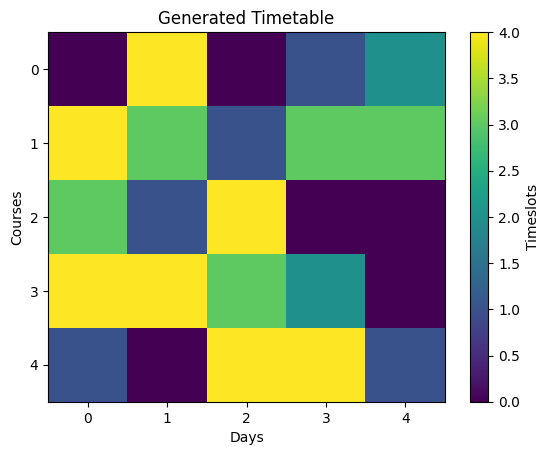

In [ ]:
def visualize_timetable(timetable):
    plt.imshow(timetable, cmap='viridis', aspect='auto')
    plt.title("Generated Timetable")
    plt.xlabel("Days")
    plt.ylabel("Courses")
    plt.colorbar(label="Timeslots")
    plt.show()

# Usage
visualize_timetable(best_timetable)